<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Logistic%2C_Random_forest%2C_or_KNN%3F_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic, Random forest, or KNN? (Core)

Jonny Tesfahun
-07/06/22

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [33]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/wisconsinBreastCancer - wisconsinBreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Cleaning & Analyzing data:

In [34]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
#Converting diagnosis from object to numbers
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

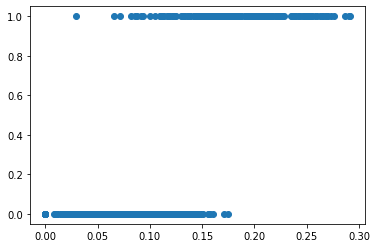

In [37]:
#ploting diagnosis B & A
plt.scatter(df['concave points_worst'], df['diagnosis'])

In [38]:
#Setting target and matrix
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

In [39]:
#train test split data with random 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Logistic Regression:

In [54]:
#making instance of the logistic regression model, scaler and making pipeline
log_reg = LogisticRegression()
scaler = StandardScaler()
log_reg_pip = make_pipeline(scaler, log_reg)

In [55]:
#fiting model
log_reg_pip.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [56]:
#Checking default model prediction scores, without regularization strength
print(log_reg_pip.score(X_train, y_train))
print(log_reg_pip.score(X_test, y_test))

0.9859154929577465
0.9790209790209791


L1 Tuning:

In [58]:
#creating regularization strength list, and list for train & test scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

In [74]:
#making iterative over the c values with solver 'saga' and penalty 'l1' and max 1000, random_state 5
for c in c_values:
  log_reg_l1 = LogisticRegression(C=c, max_iter=1000, solver='saga', random_state=5, penalty='l1')
  log_reg_pip_l1 = make_pipeline(scaler, log_reg_l1)
  log_reg_pip_l1.fit(X_train, y_train)

  train_scores.append(log_reg_pip_l1.score(X_train, y_train))
  test_scores.append(log_reg_pip_l1.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [75]:
#Looking at score to see which is better prediction, looks like it is c=1
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 0.1: 0.972027972027972,
 1: 0.9790209790209791,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

L2 tuning:

In [69]:
#creating regularization strength list, and list for train & test scores for L2
c_values_l2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores_l2 = []
test_scores_l2 = []

In [72]:
#making iterative over the c values with solver 'saga' and penalty 'l1' and max 1000, random_state 5
#using 'saga' because handles multiclass problems and uses l1 & l2 penalties
for c in c_values_l2:
  log_reg_l2 = LogisticRegression(C=c, max_iter=1000, solver='saga', random_state=5, penalty='l2')
  log_reg_pip_l2 = make_pipeline(scaler, log_reg_l2)
  log_reg_pip_l2.fit(X_train, y_train)

  train_scores_l2.append(log_reg_pip_l2.score(X_train, y_train))
  test_scores_l2.append(log_reg_pip_l2.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [73]:
#Checkingt score to see which is better prediction, looks like it is c=0.1
{c:score for c, score in zip(c_values_l2, test_scores_l2)}

{0.0001: 0.6433566433566433,
 0.001: 0.9020979020979021,
 0.01: 0.972027972027972,
 0.1: 0.986013986013986,
 1: 0.9790209790209791,
 10: 0.972027972027972,
 100: 0.972027972027972,
 1000: 0.972027972027972}

K-Nearest Neighbors:

In [152]:
#Using k nearest neighbors with n_neighbors 9, distance as weight, and leaf_size 20
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=10)

In [153]:
#Making pip with knn classifier
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=9,
                                      weights='distance'))])

In [154]:
#making prediction using pipe
prediction = knn_pipe.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [155]:
accy_score = knn_pipe.score(X_test, y_test)
accy_score

0.972027972027972

Random Forest:

In [161]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [195]:
#making instance of random forest model with n estimator 150, max depth 3
rf = RandomForestRegressor(random_state = 42, n_estimators=150, max_depth=3)

In [196]:
#fitting model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=150, random_state=42)

In [197]:
#predicting the x_test
rf.predict(X_test)

array([0.01278975, 0.99399516, 0.99399516, 0.01278975, 0.01278975,
       0.99399516, 0.99399516, 0.81624474, 0.84803878, 0.02487194,
       0.03705243, 0.99343812, 0.04452438, 0.88993112, 0.01935424,
       0.98080677, 0.02735043, 0.01278975, 0.01278975, 0.99399516,
       0.1738498 , 0.01278975, 0.99399516, 0.01278975, 0.02278415,
       0.05143695, 0.01278975, 0.03705243, 0.01278975, 0.99399516,
       0.01591655, 0.01278975, 0.24251058, 0.02689248, 0.01278975,
       0.01278975, 0.71651932, 0.02618001, 0.99399516, 0.04648066,
       0.01278975, 0.99399516, 0.01278975, 0.01278975, 0.23102194,
       0.01278975, 0.12629754, 0.04223761, 0.01278975, 0.01278975,
       0.98732849, 0.99399516, 0.12834573, 0.12258927, 0.01278975,
       0.01935424, 0.01278975, 0.99399516, 0.88973884, 0.01278975,
       0.01278975, 0.99399516, 0.99399516, 0.02278415, 0.01278975,
       0.02788402, 0.99399516, 0.98293236, 0.01278975, 0.02553703,
       0.95026503, 0.99399516, 0.01278975, 0.99399516, 0.02278

In [198]:
#checking modle performance on tes data

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)

print(f"train score: {rf_train_score}")
print(f"test score: {rf_test_score}")

train score: 0.9304645163274312
test score: 0.8611527523648844


1. Which hyperparameters did you tune for each of the models? 

- For Logistic Regression l1 and l2 models, the hyperparameters I tuned included c (regularization strength), max_iter, and solver. I picked regularization strength between 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, and 1000. And later picked the one with highest accuracy. Max_iter i kept at 1000 to keep consistency. I used solver='saga' because it worked with both l1 and l2 penalties, as well as it worked well with multiclass problems. 

- For K-Nearest Neighbors, the hyperparameters I tuned included n_neighbors, weights, and leaf_size. N_neighbors = 9 provided the highest accuracy and that is why that was used. Weight was made 'distance', because I wanted the closer neighbors of a query point to have a greater influence than neighbors which are further away. Leaf_size was made 10 just to test its impact on the model.

- For Random Forest Regressor,  the hyperparameters I tuned included n_estimators and max_depth. I made n_estimator=150 b/c i wanted a little more than the default 100. I made the max_depth = 3 so that there were 3 numbers of levels in each decision tree.


2. Which model would you put into production to diagnose malignant tumors?

- The model that I would put into production to diagnose malignant tumors would be the L2 Logistic Regression. The main reason is due to its high accuracy of 98.6% when c=0.1. The other reason would be that it handled the high correlation between features well, filtering out noise from data, and preventing overfitting better also.

3. How does consideration of the meaning of false positive and false negative errors affect how you determine what 'best' means in this case?

- Well, the best in this case is a false positive. The case being that someone being misdiagnosed and having not needed treatment is less worse than someone dying from treatment never given when it was supposed to be. Thus, false positives are the lesser of two evils between false negatives.